# Geolife GPS Trajectory Dataset
Author: Yu Zheng : Microsoft

Description: Small set of users for 5 years (2008-2013)

Purpose:

    - Monthly heatmap for each users
    
    - Take bounding box of the city

Paper: https://dl.acm.org/doi/pdf/10.1145/3380970?casa_token=Q8_OIVkv8lgAAAAA:Fdx694u6CzTSgYw22UjOoVtIBm6hLax9Ym2MLIwI2xN-5_3owwVShPe1EMi84VJlmoPCOP_yANKIgg 

Page 12 - Cell size: 15x23 = 345 pixels per image 

so 15 rows and 23 columns (for every month each user will have a heatmap of 15x23)

In [1]:
# Import Functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp

In [2]:
# read.table("file.plt", header = TRUE, quote = "\"", skip = 7, sep = ",")
df = pd.read_table("Data/000/Trajectory/20081023025304.plt", skiprows = 5, sep = ",", names=['Latitude', 'Longitude', 'Zero', 'Altitude', 'Num of Days', 'Date', 'Time'])
# User : 2008,10,23 - ID: 025304
# October 23rd, 2008

# Drop Excess Nan Data
df = df.drop(['Num of Days','Zero'], axis=1)
df = df.drop(0, axis=0)

df

Latitude   Longitude  Altitude        Date      Time
1    39.984702  116.318417     492.0  2008-10-23  02:53:04
2    39.984683  116.318450     492.0  2008-10-23  02:53:10
3    39.984686  116.318417     492.0  2008-10-23  02:53:15
4    39.984688  116.318385     492.0  2008-10-23  02:53:20
5    39.984655  116.318263     492.0  2008-10-23  02:53:25
..         ...         ...       ...         ...       ...
904  40.009172  116.321211      88.0  2008-10-23  11:10:52
905  40.009204  116.321130      86.0  2008-10-23  11:10:57
906  40.009243  116.321050      85.0  2008-10-23  11:11:02
907  40.009269  116.320978      84.0  2008-10-23  11:11:07
908  40.009328  116.320887      83.0  2008-10-23  11:11:12

[908 rows x 5 columns]

In [3]:
# Create Bounding Box
maxLat = max(df['Latitude'])
minLat = min(df['Latitude'])
maxLon = max(df['Longitude'])
minLon = min(df['Longitude'])

print(f"Latidude \t Max: {maxLat} \t Min: {minLat}")
print(f"Longitude \t Max: {maxLon} \t Min: {minLon}")

Latidude 	 Max: 40.009428 	 Min: 39.983276000000004
Longitude 	 Max: 116.324886 	 Min: 116.285446


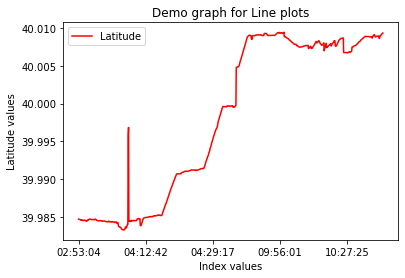

In [4]:
ax = plt.gca()
df.plot(kind="line",y = 'Latitude', x='Time', ax=ax,color='red')
ax.set_xlabel('Index values')
ax.set_ylabel('Latitude values')
plt.title('Demo graph for Line plots')
plt.show()

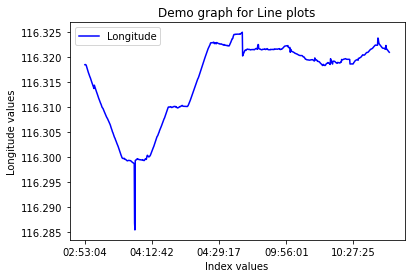

In [5]:
ax = plt.gca()
df.plot(kind="line",y = 'Longitude', x='Time', ax=ax,color='blue')
ax.set_xlabel('Index values')
ax.set_ylabel('Longitude values')
plt.title('Demo graph for Line plots')
plt.show()

w: 116.5210203
s: 39.5916221
e: 116.9480272
n: 40.030624
place: 通州区, 北京市, 101100, China 中国
zoom: 12
n_tiles: 1


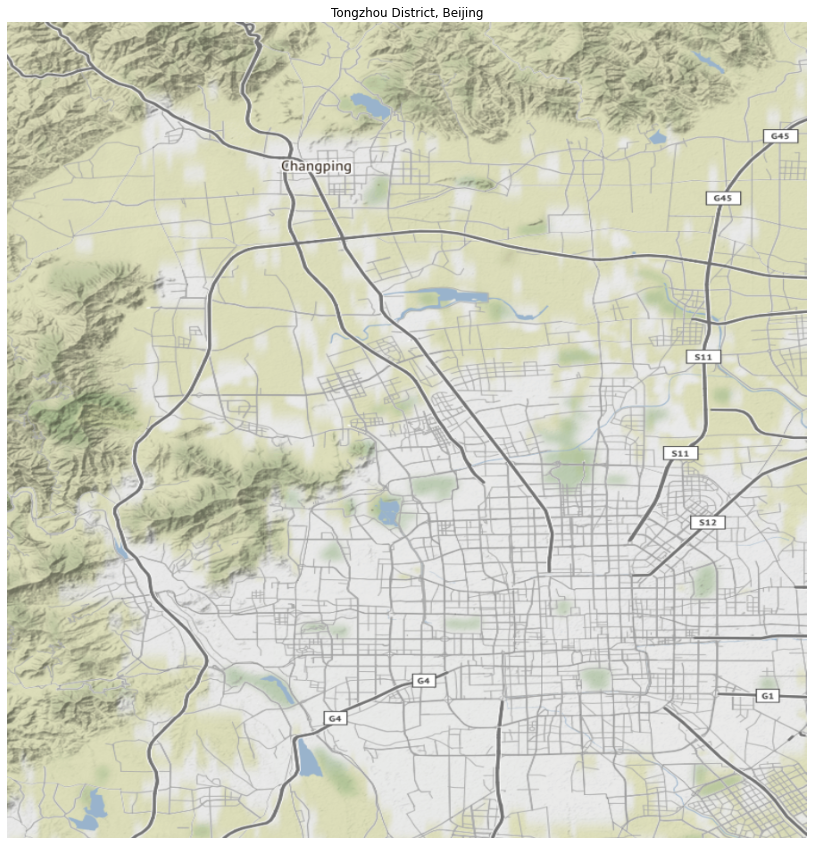

In [19]:
import contextily as ctx

# Longitude East  - West
# Latitude  North - South

loc = ctx.Place('tongzhou district', zoom_adjust=1)  # zoom_adjust modifies the auto-zoom

# Print some metadata
for attr in ["w", "s", "e", "n", "place", "zoom", "n_tiles"]:
    print("{}: {}".format(attr, getattr(loc, attr)))

# Show the map
im1 = loc.im

fig, axs = plt.subplots(1, 1, figsize=(15, 15))
#ctx.plot_map(loc, ax=axs[0])

beijing_img, beijing_ext = ctx.bounds2img(loc.w-0.5, loc.s+0.2, loc.e-0.5, loc.n+0.2, zoom=11, ll=True)
beijing_img, beijing_ext = ctx.warp_tiles(beijing_img, beijing_ext, "EPSG:4326")

ctx.plot_map(beijing_img, beijing_ext, ax=axs, title="Tongzhou District, Beijing")

plt.show()


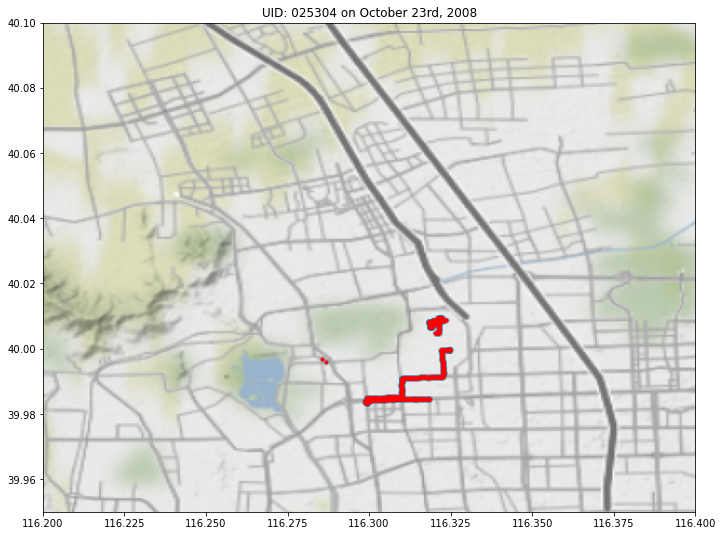

In [38]:
geometry = gp.points_from_xy(df['Longitude'], df['Latitude'])
geo_df = gp.GeoDataFrame(df, geometry = geometry)

fig, ax = plt.subplots(1, 1, figsize=(15, 9))
geoLength = len(geo_df['geometry'])

xp = [geo_df['geometry'][i].x for i in range(1, geoLength)]
yp = [geo_df['geometry'][j].y for j in range(1, geoLength)]

ax.set_xlim(116.2, 116.4)
ax.set_ylim(39.95, 40.1)
ax.set_title('UID: 025304 on October 23rd, 2008')
ax.plot(xp, yp, markersize=3, marker='o', linestyle='none', color='red', alpha=1)
geo_df.plot(ax=ax, linewidth=1, alpha=0.1)

ax.imshow(beijing_img, extent=beijing_ext)

In [ ]:
import shapely.geometry as Point
# import street map
#street_map = gp.read_file('china-latest-free.shp/gis_osm_roads_free_1.shp')
#+init=espc:4326 +type=crs: (Internal Proj Error: proj_create: cannot expand +init=espc:4326 +type=crs)

# designate coordinate system
crs = {'init': 'espc:4326'}

# zip x and y coordinates into single feature
geometry = gp.points_from_xy(df['Longitude'], df['Latitude'])

# create GeoPandas dataframe
geo_df = gp.GeoDataFrame(df,
 #crs = crs,
 geometry = geometry)

# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))

# add .shp mapfile to axes
#street_map.plot(ax=ax, alpha=0.4,color='grey')

# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
gdf.plot(column='Altitude',ax=ax,alpha=0.5, legend=True, markersize=10)

# add title to graph
plt.title('User: ', fontsize=15,fontweight='bold')

# set latitiude and longitude boundaries for map display
# plt.xlim(39.983276, 40.009428)
# plt.ylim(116.285446, 116.324886)

# show map
plt.show()